<a href="https://colab.research.google.com/github/thaohung13/AI_W10_8_4_2023/blob/main/AI_W10_8_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train.shape

169001437/169001437 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
class_name=['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar',
            'cattle','chair','chimpanzee','clock','cloud','cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster',
            'house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange',
            'orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark',
            'shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train',
            'trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']
     

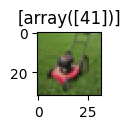

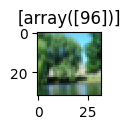

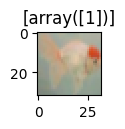

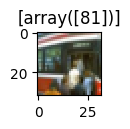

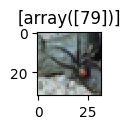

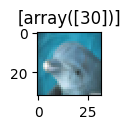

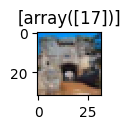

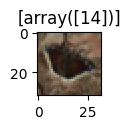

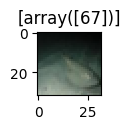

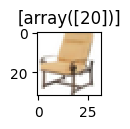

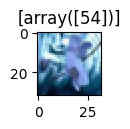

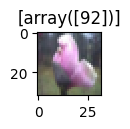

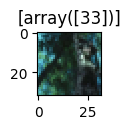

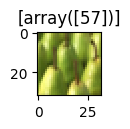

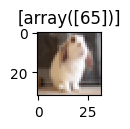

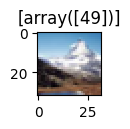

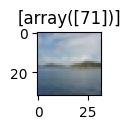

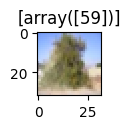

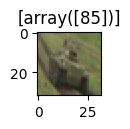

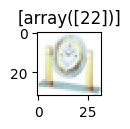

In [7]:

for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[500+i])
  plt.title([y_train[500+i]])
  plt.show()

In [8]:
x_train=x_train.reshape((50000, 32*32*3))
x_train=x_train.astype('float32')/255
print(x_train.shape)

(50000, 3072)


In [9]:
x_test=x_test.reshape((10000, 32*32*3))
x_test=x_test.astype('float32')/255
print(x_test.shape)

(10000, 3072)


In [10]:
y_train=to_categorical(y_train, 100)
print(y_train.shape)

(50000, 100)


In [11]:
y_test=to_categorical(y_test, 100)
print(y_test.shape)

(10000, 100)


In [12]:
x_train, x_test = x_train/255.0, x_test/255.0

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import keras.metrics as accuracy_score

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)
model = Sequential()
model.add(Flatten(input_shape=[32*32]))
model.add(Dense(500, activation= 'relu'))
model.add(Dense(300, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 500)               512500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
Total params: 692,900
Trainable params: 692,900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(500,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(300, activation= 'relu'))
model.add(Dense(100,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)